<a name='h'></a>
## ASSOCIATION RULE MINING

### CONTENT

- [Exploratory Data Analysis](#EDA)
- [Data Preparation](#Preparation)
- [Methodology and Result](#Apriori)

<a name='EDA'></a>
### Exploratory Data Analysis (EDA)

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.style
import matplotlib.pyplot as plt

# Suppress warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Read data from a CSV file
df = pd.read_csv("Dataset.csv")

In [3]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
19346,3478,02-04-2015,rolls/buns
19347,2295,28-12-2015,pip fruit
19348,1833,24-07-2015,dessert
19349,3307,03-03-2015,other vegetables


In [4]:
# Rename the columns of DataFrame
df.columns = ['Member_id', 'Date', 'Item']

In [5]:
# Check on missing values
df.isna().sum()

Member_id    0
Date         0
Item         0
dtype: int64

In [6]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19351 entries, 0 to 19350
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Member_id  19351 non-null  int64 
 1   Date       19351 non-null  object
 2   Item       19351 non-null  object
dtypes: int64(1), object(2)
memory usage: 453.7+ KB


In [7]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Extract year, month and day and create new columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [9]:
df

,Member_id,Date,Item,Year,Month,Day
0,1808,2015-07-21,tropical fruit,2015,7,21
1,2552,2015-05-01,whole milk,2015,5,1
2,2300,2015-09-19,pip fruit,2015,9,19
3,1187,2015-12-12,other vegetables,2015,12,12
4,3037,2015-01-02,whole milk,2015,1,2
...,...,...,...,...,...,...
19346,3478,2015-02-04,rolls/buns,2015,2,4
19347,2295,2015-12-28,pip fruit,2015,12,28
19348,1833,2015-07-24,dessert,2015,7,24
19349,3307,2015-03-03,other vegetables,2015,3,3


In [10]:
# Unique values in 'Item' column
df['Item'].value_counts()

whole milk              1545
other vegetables        1146
sausage                  924
tropical fruit           879
rolls/buns               815
                        ... 
salad dressing             2
pudding powder             2
rubbing alcohol            1
kitchen utensil            1
specialty vegetables       1
Name: Item, Length: 163, dtype: int64

In [11]:
# Summary statistics for the frequency of unique item
df['Item'].value_counts().describe()

count     163.000000
mean      118.717791
std       226.130180
min         1.000000
25%         8.000000
50%        30.000000
75%       112.500000
max      1545.000000
Name: Item, dtype: float64

In [12]:
print(f"Number of product: {df['Item'].nunique()} products")
print(f"Number of member: {df['Member_id'].nunique()} members")
print(f"Number of transactions day: {df['Date'].nunique()} days")

Number of product: 163 products
Number of member: 3873 members
Number of transactions day: 728 days


In [13]:
# Count of items purchased on each day
daily_item = df.groupby('Date').agg({'Item':'count'}).reset_index()

In [14]:
print(f"Maximum daily item sold: {daily_item['Item'].max()}")
print(f"Minimum daily item sold: {daily_item['Item'].min()}")
print(f"Average daily item sold: {round(daily_item['Item'].mean())}")

Maximum daily item sold: 60
Minimum daily item sold: 9
Average daily item sold: 27


In [15]:
# List of items for each transaction
df_baskets = df.groupby(['Date', 'Member_id'])['Item'].apply(list).reset_index()

In [16]:
df_baskets

,Date,Member_id,Item
0,2014-01-01,1249,[citrus fruit]
1,2014-01-01,1381,[curd]
2,2014-01-01,1440,[other vegetables]
3,2014-01-01,1659,[specialty chocolate]
4,2014-01-01,1789,[hamburger meat]
...,...,...,...
13966,2015-12-30,3738,[onions]
13967,2015-12-30,3971,"[brown bread, bottled beer]"
13968,2015-12-30,4058,"[domestic eggs, cream cheese ]"
13969,2015-12-30,4565,"[canned beer, canned beer]"


In [17]:
print(f"Total transactions/baskets: {df_baskets.shape[0]}")

Total transactions/baskets: 13971


In [18]:
# Create a new column to store the year for each transaction
df_baskets['Year'] = df_baskets['Date'].dt.year

# Group the data by year and count the number of unique baskets
total_transactions_by_year = df_baskets.groupby('Year')['Date'].count()

In [19]:
# Total transactions for each year
print(f"Total transactions in 2014: {total_transactions_by_year.get(2014, 0)}")
print(f"Total transactions in 2015: {total_transactions_by_year.get(2015, 0)}")

Total transactions in 2014: 6989
Total transactions in 2015: 6982


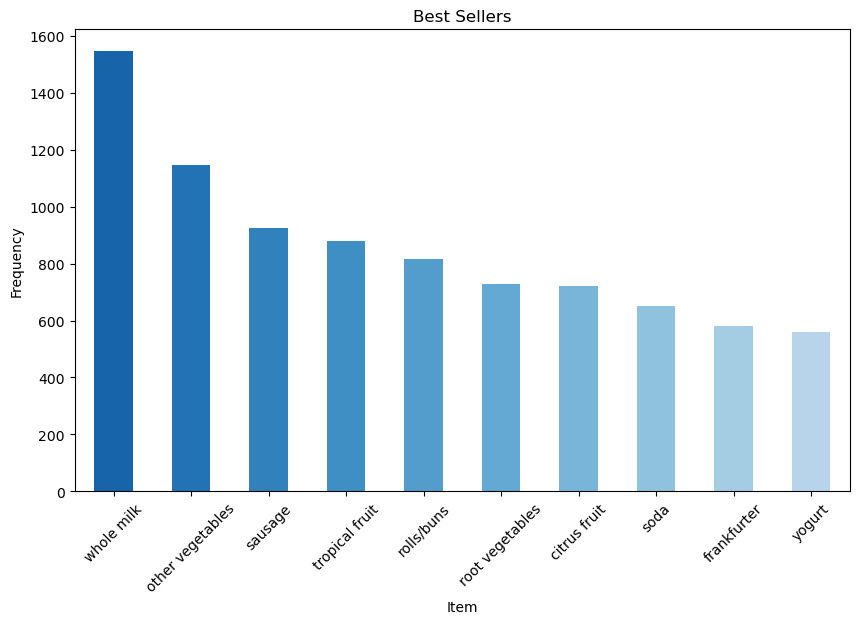

In [20]:
# Create a bar plot of the top 10 best-selling items
plt.figure(figsize=(10, 6))
df['Item'].value_counts().head(10).plot(kind='bar', color=plt.cm.Blues(np.linspace(0.8, 0.3, 10)))
plt.title("Best Sellers")
plt.xlabel("Item")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

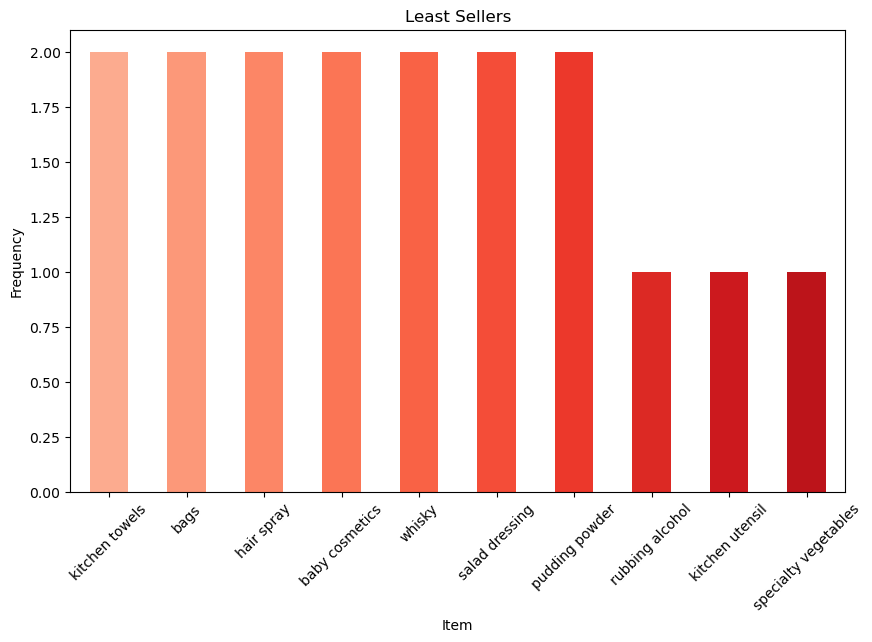

In [21]:
# Create a bar plot of the 10 least-selling items
plt.figure(figsize=(10, 6))
df['Item'].value_counts().tail(10).plot(kind='bar', color=plt.cm.Reds(np.linspace(0.3, 0.8, 10)))
plt.title("Least Sellers")
plt.xlabel("Item")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [22]:
# Count of items purchased on each year
yearly_itemsold = df.groupby('Year')['Item'].agg(['count']).reset_index()

In [23]:
print(f"Total item sold in 2014: {yearly_itemsold[yearly_itemsold['Year'] == 2014]['count'].values[0]}")
print(f"Total item sold in 2015: {yearly_itemsold[yearly_itemsold['Year'] == 2015]['count'].values[0]}")

Total item sold in 2014: 7000
Total item sold in 2015: 12351


In [24]:
# Count of item occurrences in the year 2014
df[df['Year'] == 2014]['Item'].value_counts()

whole milk          563
other vegetables    488
root vegetables     334
rolls/buns          327
tropical fruit      320
                   ... 
organic products      1
frozen fruits         1
kitchen utensil       1
liqueur               1
kitchen towels        1
Name: Item, Length: 154, dtype: int64

In [25]:
# Count of item occurrences in the year 2015
df[df['Year'] == 2015]['Item'].value_counts()

whole milk          982
sausage             744
other vegetables    658
tropical fruit      559
frankfurter         505
                   ... 
skin care             1
rice                  1
kitchen towels        1
salad dressing        1
nut snack             1
Name: Item, Length: 161, dtype: int64

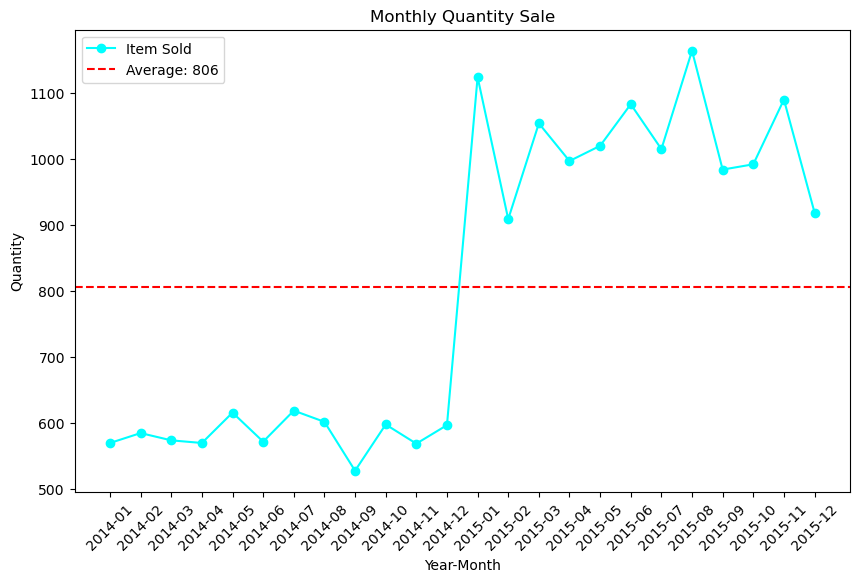

In [26]:
# Group the data by 'YearMonth' and calculate the monthly quantity sale
df['YearMonth'] = df['Date'].dt.to_period('M')
average_monthly_quantitysale = df.groupby('YearMonth')['Item'].count().mean()

# Create a line plot for average monthly item sold
monthly_quantitysale = df.groupby('YearMonth')['Item'].count()
monthly_quantitysale.index = monthly_quantitysale.index.strftime('%Y-%m')  # Convert 'YearMonth' to strings

plt.figure(figsize=(10, 6))
plt.plot(monthly_quantitysale, marker='o', linestyle='-', color='aqua', label='Item Sold')
plt.axhline(average_monthly_quantitysale, color='r', linestyle='--', label=f'Average: {int(average_monthly_quantitysale)}')
plt.title('Monthly Quantity Sale')
plt.xlabel('Year-Month')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<a name='Preparation'></a>
[to header](#h)
### Data Preparation

In [27]:
# Create a basket of items purchased by each member
basket = (df.groupby(['Date', 'Member_id', 'Item'])['Item']
          .count().unstack().reset_index().drop('Date',axis=1).fillna(0)
          .set_index('Member_id'))

In [28]:
# Encode item counts as binary (0 or 1)
df_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)

In [29]:
df_encoded

Item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_id,,,,,,,,,,,,,,,,,,,,,
1249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a name='Apriori'></a>
[to header](#h)
### Methodology and Result

In [30]:
# Import necessary libraries
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [31]:
# Determine min_support
print(f'Minimum occurrences: {df.Item.value_counts().min()}')
print(f'Total baskets: {len(df_baskets)}')

df['Item'].value_counts().min()/len(df_baskets)

Minimum occurrences: 1
Total baskets: 13971


7.157683773530885e-05

In [32]:
# Find frequent itemsets
freq_itemsets = apriori(df_encoded, min_support = 0.00007, use_colnames = True)

/Users/macos/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [33]:
freq_itemsets.sort_values(by = 'support', ascending = False)

,support,itemsets
160,0.108153,(whole milk)
101,0.080739,(other vegetables)
127,0.064634,(sausage)
152,0.061986,(tropical fruit)
119,0.057834,(rolls/buns)
...,...,...
2289,0.000072,"(chewing gum, sausage, UHT-milk)"
2290,0.000072,"(fish, chicken, UHT-milk)"
2291,0.000072,"(chicken, UHT-milk, yogurt)"
2292,0.000072,"(citrus fruit, UHT-milk, chocolate)"


In [34]:
# Find frequent itemsets
freq_itemsets = apriori(df_encoded, min_support = 0.00008, use_colnames = True)

/Users/macos/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [35]:
freq_itemsets.sort_values(by = 'support', ascending = False)

,support,itemsets
157,0.108153,(whole milk)
100,0.080739,(other vegetables)
125,0.064634,(sausage)
149,0.061986,(tropical fruit)
118,0.057834,(rolls/buns)
...,...,...
484,0.000143,"(other vegetables, chewing gum)"
900,0.000143,"(margarine, root vegetables)"
485,0.000143,"(chewing gum, photo/film)"
897,0.000143,"(margarine, pastry)"


In [36]:
# Determine min_threshold
freq_itemsets['length'] = freq_itemsets['itemsets'].apply(len)

freq_itemsets.groupby('length')['support'].describe()

,count,mean,std,min,25%,50%,75%,max
length,,,,,,,,
1,160.0,0.008568,0.016023,0.000143,0.000644,0.002183,0.008267,0.108153
2,999.0,0.000386,0.000466,0.000143,0.000143,0.000215,0.000358,0.005225
3,130.0,0.000166,0.000047,0.000143,0.000143,0.000143,0.000143,0.000358
4,1.0,0.000143,NaN,0.000143,0.000143,0.000143,0.000143,0.000143


In [37]:
# Generate association rules
rules = association_rules(freq_itemsets, metric="support", min_threshold=0.000358)

In [38]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(tropical fruit),0.011238,0.061986,0.000429,0.038217,0.616540,-0.000267,0.975287,-0.386135
1,(tropical fruit),(UHT-milk),0.061986,0.011238,0.000429,0.006928,0.616540,-0.000267,0.995661,-0.398697
2,(whole milk),(UHT-milk),0.108153,0.011238,0.000716,0.006618,0.588930,-0.000500,0.995350,-0.439034
3,(UHT-milk),(whole milk),0.011238,0.108153,0.000716,0.063694,0.588930,-0.000500,0.952517,-0.413809
4,(bottled beer),(beef),0.024050,0.033570,0.000787,0.032738,0.975232,-0.000020,0.999140,-0.025363
...,...,...,...,...,...,...,...,...,...,...
493,(whole milk),(whipped/sour cream),0.108153,0.015818,0.000930,0.008604,0.543894,-0.000780,0.992722,-0.484613
494,(whole milk),(white bread),0.108153,0.007516,0.000501,0.004633,0.616413,-0.000312,0.997104,-0.410986
495,(white bread),(whole milk),0.007516,0.108153,0.000501,0.066667,0.616413,-0.000312,0.955551,-0.385372
496,(whole milk),(yogurt),0.108153,0.039510,0.002505,0.023163,0.586262,-0.001768,0.983265,-0.441747


In [39]:
# Generate association rules
rules = association_rules(freq_itemsets, metric="support", min_threshold=0.000215)

In [40]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(UHT-milk),0.080739,0.011238,0.000286,0.003546,0.315558,-0.000621,0.992281,-0.702336
1,(UHT-milk),(other vegetables),0.011238,0.080739,0.000286,0.025478,0.315558,-0.000621,0.943294,-0.686878
2,(pip fruit),(UHT-milk),0.039582,0.011238,0.000286,0.007233,0.643669,-0.000158,0.995967,-0.365647
3,(UHT-milk),(pip fruit),0.011238,0.039582,0.000286,0.025478,0.643669,-0.000158,0.985527,-0.358927
4,(pork),(UHT-milk),0.037005,0.011238,0.000286,0.007737,0.688489,-0.000130,0.996472,-0.319655
...,...,...,...,...,...,...,...,...,...,...
909,"(whole milk, yogurt)",(sausage),0.002505,0.064634,0.000358,0.142857,2.210252,0.000196,1.091260,0.548938
910,"(sausage, yogurt)",(whole milk),0.001718,0.108153,0.000358,0.208333,1.926291,0.000172,1.126544,0.481695
911,(whole milk),"(sausage, yogurt)",0.108153,0.001718,0.000358,0.003309,1.926291,0.000172,1.001597,0.539181
912,(sausage),"(whole milk, yogurt)",0.064634,0.002505,0.000358,0.005537,2.210252,0.000196,1.003049,0.585399


In [41]:
# Filter and sort rules based on specific conditions
rules[rules['zhangs_metric'] > 0.5].sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
892,"(sausage, pastry)",(whole milk),0.001074,0.108153,0.000358,0.333333,3.082065,0.000242,1.337771,0.676268
891,"(whole milk, pastry)",(sausage),0.001718,0.064634,0.000358,0.208333,3.223283,0.000247,1.181515,0.690944
868,"(sausage, frankfurter)",(other vegetables),0.001575,0.080739,0.000286,0.181818,2.251934,0.000159,1.123542,0.556814
909,"(whole milk, yogurt)",(sausage),0.002505,0.064634,0.000358,0.142857,2.210252,0.000196,1.091260,0.548938
514,(frozen fish),(tropical fruit),0.002648,0.061986,0.000358,0.135135,2.180107,0.000194,1.084579,0.542744
714,(pasta),(sausage),0.002720,0.064634,0.000358,0.131579,2.035758,0.000182,1.077088,0.510170
301,(hygiene articles),(chicken),0.003364,0.028702,0.000358,0.106383,3.706425,0.000261,1.086928,0.732663
866,"(other vegetables, sausage)",(frankfurter),0.002935,0.040441,0.000286,0.097561,2.412433,0.000168,1.063295,0.587204
872,"(other vegetables, whole milk)",(frankfurter),0.004080,0.040441,0.000358,0.087719,2.169073,0.000193,1.051824,0.541182
40,(long life bakery product),(beef),0.004939,0.033570,0.000429,0.086957,2.590340,0.000264,1.058471,0.616998


In [42]:
# Filter rules based on specific condition
rules[rules['zhangs_metric'] < -0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(UHT-milk),0.080739,0.011238,0.000286,0.003546,0.315558,-0.000621,0.992281,-0.702336
1,(UHT-milk),(other vegetables),0.011238,0.080739,0.000286,0.025478,0.315558,-0.000621,0.943294,-0.686878
6,(sausage),(UHT-milk),0.064634,0.011238,0.000286,0.004430,0.394185,-0.000440,0.993162,-0.621653
7,(UHT-milk),(sausage),0.011238,0.064634,0.000286,0.025478,0.394185,-0.000440,0.959820,-0.608511
16,(bottled water),(beef),0.026698,0.033570,0.000358,0.013405,0.399315,-0.000538,0.979561,-0.607158
...,...,...,...,...,...,...,...,...,...,...
849,(tropical fruit),(whipped/sour cream),0.061986,0.015818,0.000358,0.005774,0.364995,-0.000623,0.989897,-0.649704
852,(whole milk),(tropical fruit),0.108153,0.061986,0.003364,0.031105,0.501814,-0.003340,0.968128,-0.526775
853,(tropical fruit),(whole milk),0.061986,0.108153,0.003364,0.054273,0.501814,-0.003340,0.943028,-0.514179
856,(turkey),(whole milk),0.005297,0.108153,0.000286,0.054054,0.499794,-0.000287,0.942810,-0.501533


(array([ 69., 205., 252., 132.,  76.,  55.,  50.,  35.,  24.,  16.]),
 array([-0.80025196, -0.64448038, -0.48870879, -0.33293721, -0.17716562,
        -0.02139404,  0.13437755,  0.29014913,  0.44592072,  0.6016923 ,
         0.75746388]),
 <BarContainer object of 10 artists>)

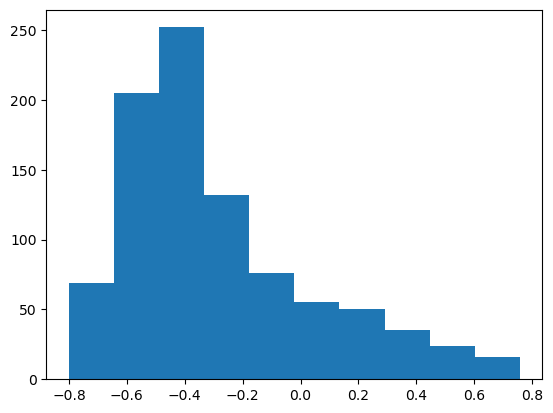

In [43]:
plt.hist(rules['zhangs_metric'])

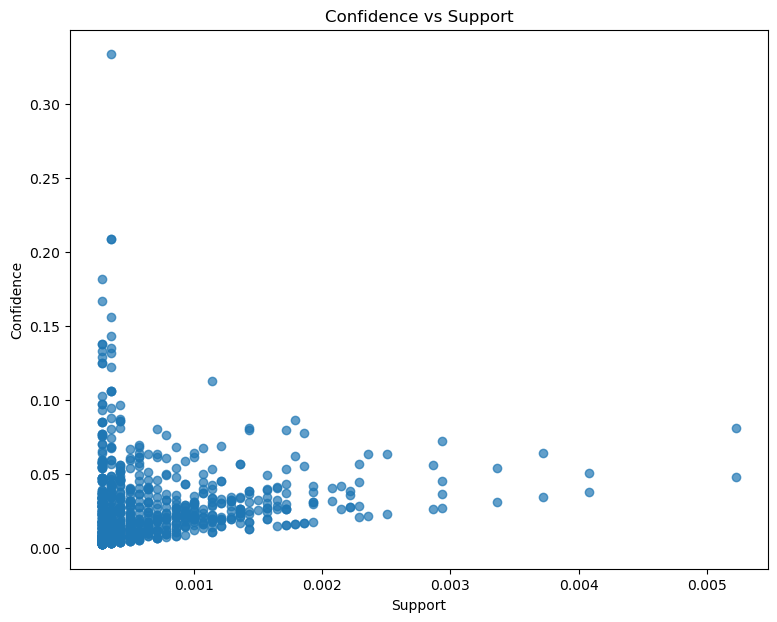

In [44]:
# Create a scatter plot of confidence vs. support for association rules
plt.figure(figsize=(9, 7))
plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title("Confidence vs Support")
plt.show()

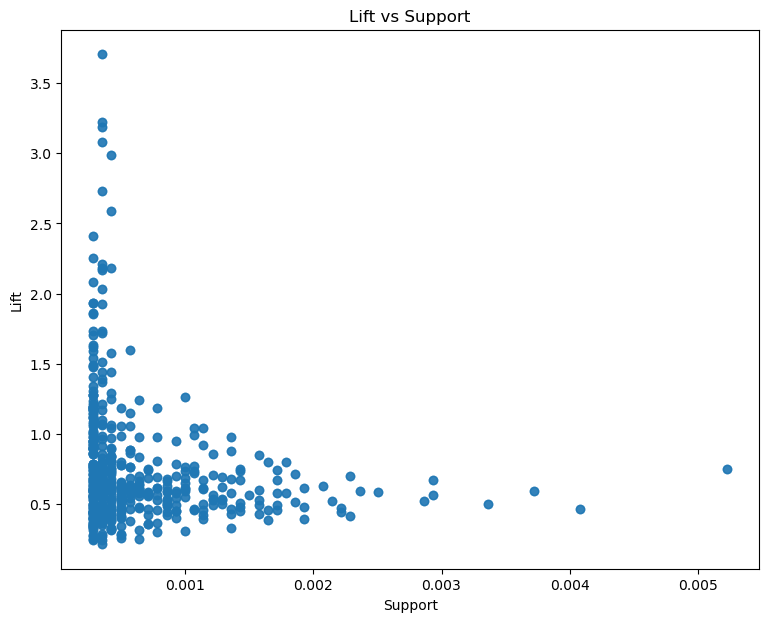

In [45]:
# Create a scatter plot of lift vs. support for association rules
plt.figure(figsize=(9, 7))
plt.scatter(rules['support'], rules['lift'], alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title("Lift vs Support")
plt.show()